In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('/home/anu/Downloads/Datasets/titanic(1).csv',usecols=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [2]:
#age,pclass,mfemale,embarked,et...

In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:>

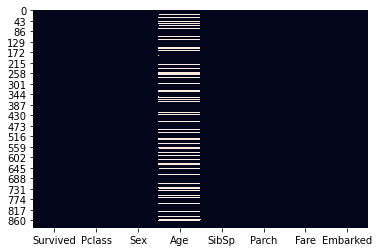

In [4]:
sns.heatmap(df.isnull(),cbar=False)

In [5]:
def input_missing_age(columns):
    age =columns[0]
    passenger_class = columns[1]
    if pd.isnull(age):
        if(passenger_class==1):
            return df[df['Pclass']==1]['Age'].mean()
        elif(passenger_class==2):
            return df[df['Pclass']==2]['Age'].mean()
        elif(passenger_class==3):
            return df[df['Pclass']==3]['Age'].mean()
    else:
        return age

In [6]:
df['Age']=df[['Age','Pclass']].apply(input_missing_age,axis=1)

<AxesSubplot:>

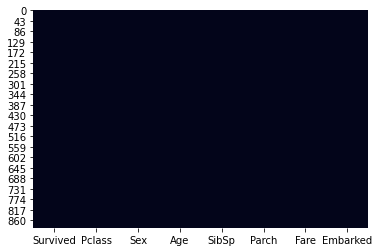

In [7]:
sns.heatmap(df.isnull(),cbar=False)


In [8]:
#df.drop(['Cabin'],axis='columns',inplace=True)

In [9]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

x=df.drop('Survived',axis=1)
y=df['Survived']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42)
depth_val=np.arange(2,11)
leaf_val=np.arange(1,31,step=9)

grid_params=[{'max_depth':depth_val,'min_samples_leaf':leaf_val}]

model=DecisionTreeClassifier(criterion='entropy')
grid_search=GridSearchCV(estimator=model,param_grid=grid_params,\
                        cv=KFold(n_splits=10))

grid_search.fit(xtrain,ytrain)
best_depth=grid_search.best_params_['max_depth']
best_min_samples=grid_search.best_params_['min_samples_leaf']

model=DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,\
                            min_samples_leaf=best_min_samples)
titanic=model.fit(xtrain,ytrain)
survive_pred=model.predict(xtest)

/home/anu/yes/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/utils/validat

/home/anu/yes/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/utils/validat

/home/anu/yes/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/utils/validat

/home/anu/yes/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/utils/validat

/home/anu/yes/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/anu/yes/lib/python3.8/site-packages/sklearn/utils/validat

ValueError: could not convert string to float: 'male'

In [1]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,xtest,ytest,display_labels=['Survived','Dead'])
print('Score:',titanic.score(xtest,ytest))

NameError: name 'model' is not defined